<a href="https://colab.research.google.com/github/kingglory/langchain-chinese-learning/blob/main/langchain%E4%B8%AD%E6%96%87%E7%BB%83%E4%B9%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.8 MB/s eta 0:00:00


In [14]:
pip install google-search-results

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32002 sha256=e6bc6f9637f2edd4f2a7c99637967805f799771e4f73e68cf9e9a63d6f7dcd6b
  Stored in directory: /root/.cache/pip/wheels/d3/b2/c3/03302d12bb44a2cdff3c9371f31b72c0c4e84b8d2285eeac53
Successfully built google-search-results


In [3]:
pip install langchain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.4/969.4 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 5.4 MB/s eta 0:00:00


In [1]:
import os
os.environ["OPENAI_API_KEY"] = 'sk-'

In [ ]:
from langchain.llms import OpenAI

llm = OpenAI(model_name="text-davinci-003",max_tokens=1024)
llm("怎么评价人工智能")

## 通过 Google 搜索并返回答案

接下来，我们就来搞点有意思的。我们来让我们的 OpenAI api 联网搜索，并返回答案给我们。
这里我们需要借助 Serpapi 来进行实现，Serpapi 提供了 google 搜索的 api 接口。
首先需要我们到 Serpapi 官网上注册一个用户，https://serpapi.com/ 并复制他给我们生成 api key。
然后我们需要像上面的 openai api key 一样设置到环境变量里面去。

In [10]:
os.environ["SERPAPI_API_KEY"] = '3fdf'

In [12]:
import langchain
print(dir(langchain.llms))

['AI21', 'AlephAlpha', 'Anthropic', 'Anyscale', 'AzureOpenAI', 'Banana', 'BaseLLM', 'Beam', 'Bedrock', 'CTransformers', 'CerebriumAI', 'Cohere', 'Databricks', 'DeepInfra', 'Dict', 'FakeListLLM', 'ForefrontAI', 'GPT4All', 'GooglePalm', 'GooseAI', 'HuggingFaceEndpoint', 'HuggingFaceHub', 'HuggingFacePipeline', 'HuggingFaceTextGenInference', 'HumanInputLLM', 'LlamaCpp', 'Modal', 'MosaicML', 'NLPCloud', 'OpenAI', 'OpenAIChat', 'OpenLM', 'Petals', 'PipelineAI', 'PredictionGuard', 'PromptLayerOpenAI', 'PromptLayerOpenAIChat', 'RWKV', 'Replicate', 'SagemakerEndpoint', 'SelfHostedHuggingFaceLLM', 'SelfHostedPipeline', 'StochasticAI', 'Type', 'VertexAI', 'Writer', '__all__', '__annotations__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'ai21', 'aleph_alpha', 'anthropic', 'anyscale', 'bananadev', 'base', 'beam', 'bedrock', 'cerebriumai', 'cohere', 'ctransformers', 'databricks', 'deepinfra', 'fake', 'forefrontai', 'google_

In [15]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.llms import OpenAI
from langchain.agents import AgentType

# 加载 OpenAI 模型
llm = OpenAI(temperature=0,max_tokens=2048) 

 # 加载 serpapi 工具
tools = load_tools(["serpapi"])

# 如果搜索完想再计算一下可以这么写
# tools = load_tools(['serpapi', 'llm-math'], llm=llm)

# 如果搜索完想再让他再用python的print做点简单的计算，可以这样写
# tools=load_tools(["serpapi","python_repl"])

# 工具加载后都需要初始化，verbose 参数为 True，会打印全部的执行详情
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

# 运行 agent
agent.run("What's the date today? What great events have taken place today in history?")



> Entering new AgentExecutor chain...
 I should look up the current date and then search for historical events that have taken place on that day.
Action: Search
Action Input: Current date
Observation: Today's current date and time with time zone and date picker: Select locale. en-US. Wednesday, May 31, 2023. 5:00:05 PM. PST8PDT (GMT-7).
Thought: I should now search for historical events that have taken place on this day.
Action: Search
Action Input: Historical events May 31
Observation: 1911 – The RMS Titanic is launched in Belfast, Northern Ireland. 1911 – The President of Mexico Porfirio Díaz flees the country during the Mexican Revolution. 1916 – World War I: Battle of Jutland: The British Grand Fleet engages the High Seas Fleet in the largest naval battle of the war, which proves indecisive.
Thought: I now know the final answer.
Final Answer: Today is Wednesday, May 31, 2023. Historical events that have taken place on this day include the launch of the RMS Titanic in Belfast, Nor

'Today is Wednesday, May 31, 2023. Historical events that have taken place on this day include the launch of the RMS Titanic in Belfast, Northern Ireland, the flight of the President of Mexico Porfirio Díaz during the Mexican Revolution, and the Battle of Jutland in World War I.'

我们可以看到，他正确的返回了日期（有时差），并且返回了历史上的今天。  

在 chain 和 agent 对象上都会有 verbose 这个参数，这个是个非常有用的参数，开启他后我们可以看到完整的 chain 执行过程。  

可以在上面返回的结果看到，他将我们的问题拆分成了几个步骤，然后一步一步得到最终的答案。
关于agent type 几个选项的含义（理解不了也不会影响下面的学习，用多了自然理解了）：
* zero-shot-react-description: 根据工具的描述和请求内容的来决定使用哪个工具（最常用）
* react-docstore: 使用 ReAct 框架和 docstore 交互, 使用Search 和Lookup 工具, 前者用来搜, 后者寻找term, 举例: Wipipedia 工具
* self-ask-with-search 此代理只使用一个工具: Intermediate Answer, 它会为问题寻找事实答案(指的非 gpt 生成的答案, 而是在网络中,文本中已存在的), 如 Google search API 工具
* conversational-react-description: 为会话设置而设计的代理, 它的prompt会被设计的具有会话性, 且还是会使用 ReAct 框架来决定使用来个工具, 并且将过往的会话交互存入内存
  
    -  reAct 介绍可以看这个：https://arxiv.org/pdf/2210.03629.pdf
    - LLM 的 ReAct 模式的 Python 实现: https://til.simonwillison.net/llms/python-react-pattern
    - agent type 官方解释：
https://python.langchain.com/en/latest/modules/agents/agents/agent_types.html?highlight=zero-shot-react-description

有一点要说明的是，这个 serpapi 貌似对中文不是很友好，所以提问的 prompt 建议使用英文。

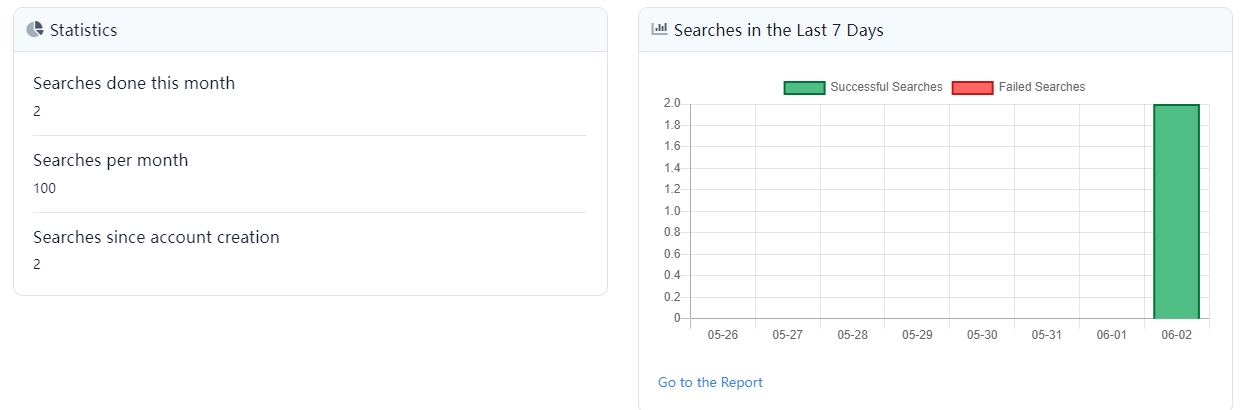

上面那个任务一共搜索了两次（ serpapi 一个月免费搜索100次）

## 对超长文本进行总结

假如我们想要用 openai api 对一个段文本进行总结，我们通常的做法就是直接发给 api 让他总结。但是如果文本超过了 api 最大的 token 限制就会报错。
这时，我们一般会进行对文章进行分段，比如通过 tiktoken 计算并分割，然后将各段发送给 api 进行总结，最后将各段的总结再进行一个全部的总结。
如果，你用是 LangChain，他很好的帮我们处理了这个过程，使得我们编写代码变的非常简单。